In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import json
import cv2
import numpy as np

# # Set the base directory where the files are located
# base_dir = '/content/drive/MyDrive/wound_detection/wdd_temp1'

# # Create directories to store the cropped images and labels
# cropped_dir = os.path.join(base_dir, 'cropped_images')
# cropped_images_dir = os.path.join(cropped_dir, 'images')
# cropped_labels_dir = os.path.join(cropped_dir, 'labels')

# # Create the directories if they don't exist
# for dir_path in [cropped_dir, cropped_images_dir, cropped_labels_dir]:
#     if not os.path.exists(dir_path):
#         os.makedirs(dir_path)

# # Iterate through the subdirectories
# for subdir in os.listdir(base_dir):
#     if subdir != 'cropped_images':
#         subdir_path = os.path.join(base_dir, subdir)
#         for root, dirs, files in os.walk(subdir_path):
#             for file in files:
#                 if file.endswith('.json'):
#                     # Load the JSON file
#                     json_path = os.path.join(root, file)
#                     with open(json_path, 'r') as f:
#                         data = json.load(f)

#                     # Get the ROI, wound_area, and wound coordinates from the JSON file
#                     roi = data['shapes'][0]['points']
#                     wound_area = data['shapes'][1]['points']
#                     wound = data['shapes'][2]['points']

#                     # Construct the image file path
#                     image_file = file.replace('.json', '.jpg')
#                     image_path = os.path.join(root, image_file)

#                     # Load the image and check if it's valid
#                     image = cv2.imread(image_path)
#                     if image is None:
#                         print(f"Error loading image: {image_path}")
#                         continue

#                     # Crop the image based on the ROI coordinates
#                     roi_x, roi_y, roi_w, roi_h = int(roi[0][0]), int(roi[0][1]), int(roi[1][0] - roi[0][0]), int(roi[1][1] - roi[0][1])
#                     cropped_image = image[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]

#                     # Check if the cropped image is valid
#                     if cropped_image is None or cropped_image.size == 0:
#                         print(f"Error cropping image: {image_path}")
#                         continue

#                     # Save the cropped image to the 'cropped_images/images' directory
#                     cropped_image_file = os.path.join(cropped_images_dir, file.replace('.json', '.jpg'))
#                     cv2.imwrite(cropped_image_file, cropped_image)
#                     print(f"Saved cropped image: {cropped_image_file}")

#                     # Save the JSON file to the 'cropped_images/labels' directory
#                     cropped_label_file = os.path.join(cropped_labels_dir, file)
#                     with open(cropped_label_file, 'w') as f:
#                         json.dump(data, f)
#                     print(f"Saved cropped label: {cropped_label_file}")

In [ ]:
##FROM PREVIOUS CODE
# cropped_images = '/content/drive/MyDrive/wound_detection/wdd_temp1/cropped_images/images'

# for image_name in os.listdir(cropped_images):
#     # Convert image to grayscale
#     img_path = cropped_images+'/'+image_name
#     img = cv2.imread(img_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         #gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         # Apply adaptive thresholding to create a binary mask
#     _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#         # Find contours in the mask
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         # Create a blank mask image
#     #mask_image = np.zeros_like(img_path)
#     mask_image = np.zeros(img.shape, dtype = 'uint8')
#     # Draw contours on the mask image
#     cv2.drawContours(mask_image, contours, -1, (0, 255, 255), thickness=cv2.FILLED)
#     # Apply the mask to the cropped image
#     #masked_image = cv2.bitwise_and(img_path, mask_image)
#     path = '/content/drive/MyDrive/wound_detection/wdd_temp1/masks'
#     if not os.path.exists(path):
#       os.makedirs(path)
#     cv2.imwrite(os.path.join(path , image_name + '.jpg'),mask_image)
#     cv2.waitKey(0)


In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/wound_detection/wdd_temp1/cropped_images/images/20230918_174755.jpg')
image_wt = image.shape[1]
image_ht = image.shape[0]
print(image_wt)
print(image_ht)

1013
925


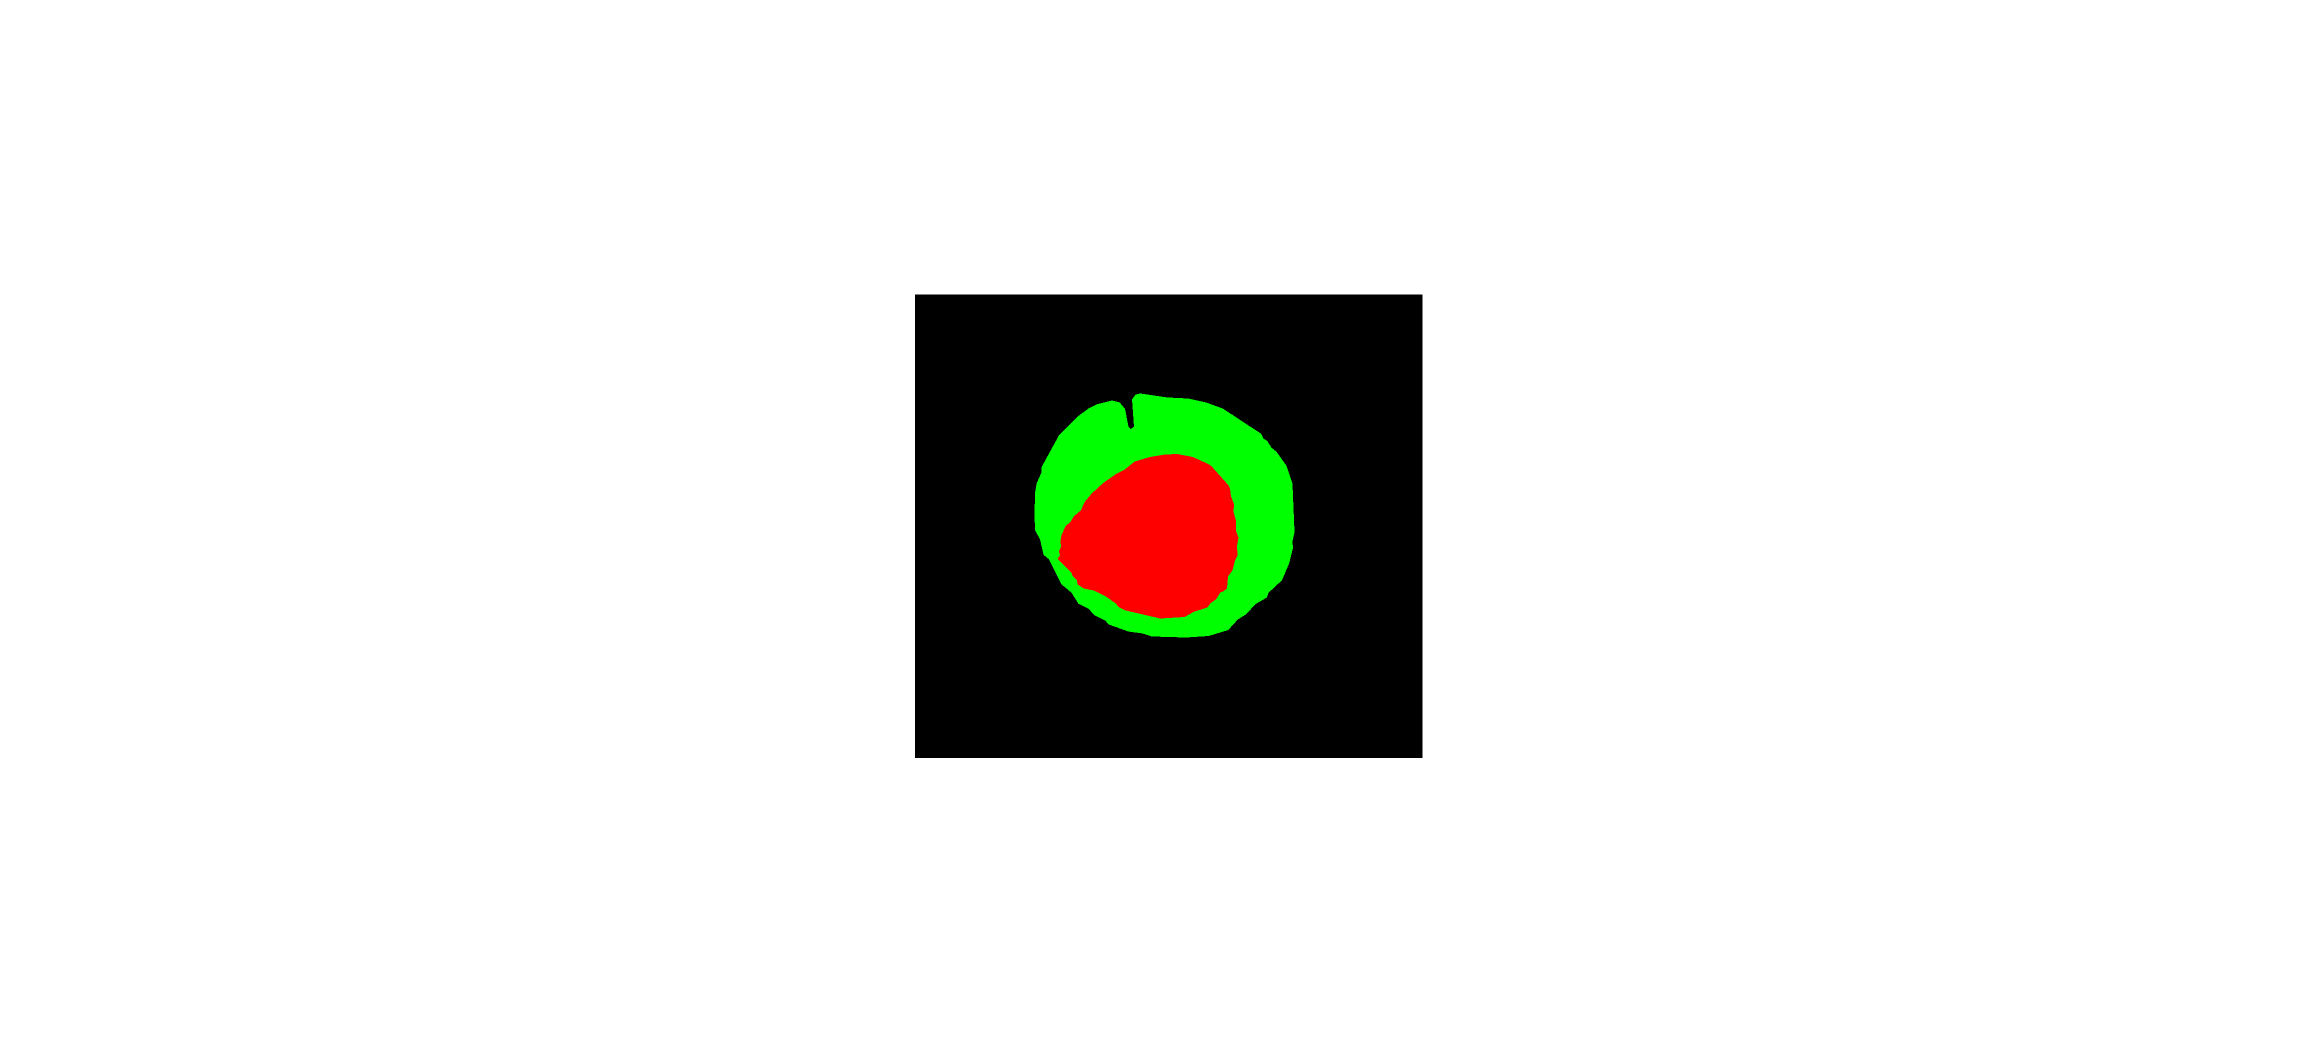

In [ ]:
import json
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
from PIL import Image as PILImage

# Load the JSON file
with open('/content/drive/MyDrive/wound_detection/wdd_temp1/cropped_images/labels/20230918_174755.json') as f:
    data = json.load(f)

# Create a mask for all labels
mask = np.ones((2128, 4608, 3), dtype=np.uint8) * 255  # Initialize with white background
# Iterate over the shapes
for shape in data['shapes']:
    label = shape['label']
    points = np.array(shape['points'], dtype=np.int32)

    if label == 'roi':
        x, y, w, h = cv2.boundingRect(points)
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 0), -1)
    elif label == 'wound_area':
        cv2.fillPoly(mask, [points], (0, 255, 0))
    elif label == 'wound':
        cv2.fillPoly(mask, [points], (0, 0, 255))

# Resize the mask to a smaller size
scale_percent = 50  # percent of original size
width = int(mask.shape[1] * scale_percent / 100)
height = int(mask.shape[0] * scale_percent / 100)
dim = (width, height)
resized_mask = cv2.resize(mask, dim, interpolation=cv2.INTER_AREA)

# Display the resized mask
_, img_encoded = cv2.imencode('.png', resized_mask)
display(Image(data=img_encoded.tobytes()))

In [ ]:
#LABELS
import os
import json
import cv2
import numpy as np

# Set the input and output directories
input_dir = '/content/drive/MyDrive/wound_detection/wdd_temp1/cropped_images/labels'
output_dir = '/content/drive/MyDrive/wound_detection/wdd_temp1/segmentation_data/masks'


# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

count = 0
# Iterate over all JSON files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".json"):
        # print(f"Processing {filename}...")

        # Load the JSON file
        with open(os.path.join(input_dir, filename)) as f:
            data = json.load(f)

        # Create a white mask image
        mask = np.ones((data['imageHeight'], data['imageWidth'], 3), dtype=np.uint8) * 255

        # Iterate over the shapes in the JSON data
        roi_points = None
        for shape in data['shapes']:
            label = shape['label']
            points = np.array(shape['points'], dtype=np.int32)

            if label == 'roi':
                roi_points = points
                x, y, w, h = cv2.boundingRect(points)
                cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 0), -1)  # fill with black
            elif label == 'wound_area':
                cv2.fillPoly(mask, [points], (0, 255, 0))
            elif label == 'wound':
                cv2.fillPoly(mask, [points], (0, 0, 255))

        # Crop the mask image using the ROI coordinates
        if roi_points is not None:
            x, y, w, h = cv2.boundingRect(roi_points)
            cropped_mask = mask[y:y+h, x:x+w]
        else:
            cropped_mask = mask
            print("!!!")
        #
        # Save the masked image
        filename1 = os.path.splitext(filename)[0]
        cv2.imwrite(os.path.join(output_dir, f"{filename1}.jpg"), cropped_mask)

    count += 1
print(count)

print("Success")

68
Success


In [ ]:
import shutil
import os

src_folder = '/content/drive/MyDrive/wound_detection/wdd_temp1/cropped_images/images'
dst_folder = '/content/drive/MyDrive/wound_detection/wdd_temp1/segmentation_data/images'

if not os.path.exists(dst_folder):
    os.makedirs(dst_folder)

for filename in os.listdir(src_folder):
    if filename.endswith(('.jpg')):
        shutil.copy(os.path.join(src_folder, filename), dst_folder)

In [ ]:
import os
import cv2

# Set the folder paths
images_folder = '/content/drive/MyDrive/wound_detection/wdd_temp1/segmentation_data/images'
labels_folder = '/content/drive/MyDrive/wound_detection/wdd_temp1/segmentation_data/masks'

# Set the desired image size
target_size = (512, 512)

# Resize images and convert to PNG
for filename in os.listdir(images_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(images_folder, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, target_size)
        png_filename = filename.replace('.jpg', '.png')
        png_path = os.path.join(images_folder, png_filename)
        cv2.imwrite(png_path, resized_img)
        os.remove(img_path)

# Resize labels and convert to PNG
for filename in os.listdir(labels_folder):
    if filename.endswith('.jpg'):
        label_path = os.path.join(labels_folder, filename)
        label = cv2.imread(label_path)
        resized_label = cv2.resize(label, target_size)
        png_filename = filename.replace('.jpg', '.png')
        png_path = os.path.join(labels_folder, png_filename)
        cv2.imwrite(png_path, resized_label)
        os.remove(label_path)

print("All images and labels resized to 512x512, converted to PNG, and original .jpg files removed!")

All images and labels resized to 512x512, converted to PNG, and original .jpg files removed!
